<a href="https://colab.research.google.com/github/Sachinparashar52/Stockpredict/blob/master/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score


In [0]:
#import plottings
import matplotlib.pyplot as plt



In [4]:
#loading csv file from 1 march 2017 to 28 feb 2019
url = 'https://github.com/Sachinparashar52/Stockpredict/raw/master/INFRATEL_01-03-2017_28-02-2019.csv'
df= pd.read_csv(url)
df.head()

,Date,High Price,Low Price,Close Price,Total Traded Quantity,Turnover (in lacs),No. of Contracts,Unnamed: 7
0,01-Mar-2017,292.05,285.00,288.95,5145017,14863.446792,4754,NaN
1,02-Mar-2017,293.75,287.80,289.80,2879156,8381.782253,3194,NaN
2,03-Mar-2017,310.00,294.05,307.90,12442632,37881.641784,13155,NaN
3,06-Mar-2017,312.75,305.75,310.10,5737310,17756.782953,4559,NaN
4,07-Mar-2017,314.90,309.00,310.10,3416663,10657.944345,3149,NaN


In [0]:
#Change Date to Numeric value
df['Date'] = pd.to_numeric(df['Date'],1)

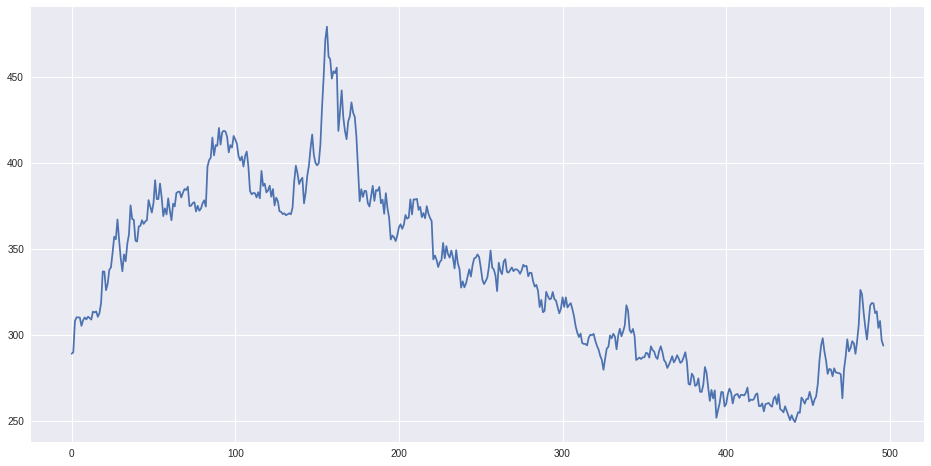

In [6]:
#plot of close price with date 

plt.figure(figsize=(16,8))
plt.plot(df['Close Price'], label='Close Price history')
plt.show()

In [0]:
#creating list of close price and date
prices = df['Close Price'].tolist()
dates = df.index.tolist()


In [0]:
dates = np.reshape(dates, (len(dates), 1))
prices = np.reshape(prices, (len(prices), 1))


In [9]:
#using linear regression function
regr = LinearRegression()
regr.fit(dates, prices)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

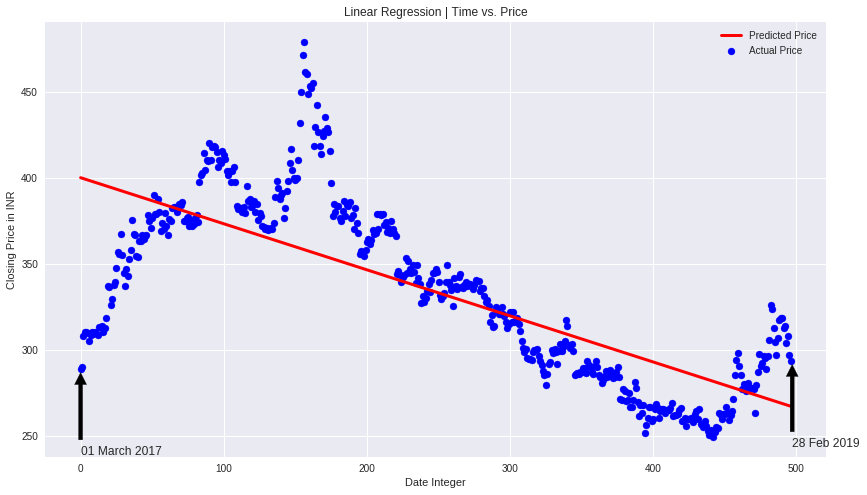

In [16]:
#plotting the graph
plt.figure(figsize=(14,8))
plt.scatter(dates, prices, color='blue', label= 'Actual Price') #plotting the initial datapoints
plt.plot(dates, regr.predict(dates), color='red', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression | Time vs. Price')
plt.legend()
plt.xlabel('Date Integer')
plt.ylabel('Closing Price in INR')
#Annotate First and Last Date
plt.annotate(

'01 March 2017', xy=(0,prices[0]), xytext=(0, prices[0]-50),
 
# Custom arrow
arrowprops=dict(facecolor='black', shrink=0.05)
)
plt.annotate(
#Custom arrow
'28 Feb 2019', xy=(len(dates),prices[-1] ), xytext=(len(dates), prices[-1]-50),
 arrowprops=dict(facecolor='black', shrink=0.05)
)

plt.show()

 

In [0]:
price_true=prices
price_pred=regr.predict(dates)


In [18]:
# The coefficients
print('Coefficients: \n', regr.coef_)


Coefficients: 
 [[-0.26813293]]


In [14]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(price_true, price_pred))


Mean squared error: 1141.75


In [15]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(price_true, price_pred))

Variance score: 0.56


From Variance Score we know that probability of successful prediction by our model is 56%